In [73]:
##2.3.1
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#2
#Создаем датафрейм
url = "https://raw.githubusercontent.com/Walfeinick/dpo-walfeinick-rep/main/data/S02-hw-dataset.csv"
data =pd.read_csv(url, sep=',')

#3
#Выводим первые строки
data.head(n=10)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [74]:
#Выводим информацию о столбцах и типах
print(f"Информацию о столбцах и типах: \n")
data.info()

#Вывод базовых описательных статистик
print(f"\nБазовая статистика: \n")
data.describe()

Информацию о столбцах и типах: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Базовая статистика: 



,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [75]:
##2.3.2
#1
print(f"Доля пропусков в столбцах: \n{data.isna().mean()}")
print(f"\nКол-во пропусков в столбцах:\n{data.isna().sum()}")

#2
print(f"\nКол-во дубликатов: {data.duplicated().sum()}")

Доля пропусков в столбцах: 
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Кол-во пропусков в столбцах:
user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

Кол-во дубликатов: 1


In [76]:
#3
#Задаем фильтр для "подозрительных" данных
mask = (data["age"] > 100) | (data["age"]<0) | (data['purchases']<0) | ((data["revenue"] >0) & (data["purchases"] <0 )) | ((data["revenue"] ==0) & (data["purchases"] >0 ))
#Создаем второй датафрейм с подозрителными данными
suspicious_data = data[mask]
#Выводим его
print(f"Подозрительные данные:\n{suspicious_data}")

Подозрительные данные:
    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
10       11   24.0      US          4        0


В представленном датасете найдены несколько логических противеоречий. Возраст одного из клиентов не реалистичный, а у другого при положительном значении покупок видим доход 0, что тоже не состыковывается с реальностью.

Количество данных слишком маленькое (всего 40 строк), есть дубликаты. Доля пропусков приемлемая и встречается только в столбце "возраст", также минимальный возраст клиента 5 лет, что вызывает подозрения в выбросе.

In [77]:
#Очистим данные
clean_data=data.drop_duplicates()
clean_data = clean_data[
    (clean_data['age'] >= 1) & (clean_data['age'] <= 100) &  # нормальный возраст
    ~((clean_data['purchases'] > 0) & (clean_data['revenue'] <= 0)) &  # нет логических противоречий
    (clean_data['purchases'] >= 0)  # нет отрицательных покупок
]

In [78]:
#2.3.3
#1
country_frequency = clean_data.value_counts(["country"])
print(f"Частота встреч стран:\n{country_frequency}")

Частота встреч стран:
country
RU         12
FR         11
US          6
DE          5
CN          2
Name: count, dtype: int64


In [79]:
#Разобьем датасет по категориям и посмотрим частоту категорий дохода
cuted=pd.cut(clean_data['revenue'], 5,labels=['Low','Medium','High','Very High','Exclusive'], include_lowest=True)
revres = cuted.value_counts(["revenue"])
print(f"Частота категорий покупок:\n{revres}")

Частота категорий покупок:
revenue
Low          0.361111
Medium       0.305556
High         0.166667
Very High    0.083333
Exclusive    0.083333
Name: proportion, dtype: float64


In [80]:
#Посмотрим статистику по странам
newdf=clean_data.groupby('country').agg({'purchases': ['sum', 'mean'], 'revenue': ['sum', 'mean']})
newdf

purchases           revenue             
              sum      mean     sum         mean
country                                         
CN              9  4.500000    2108  1054.000000
DE             33  6.600000    7377  1475.400000
FR             52  4.727273    7326   666.000000
RU             55  4.583333    9760   813.333333
US             24  4.000000    3829   638.166667

Jgbcfybt


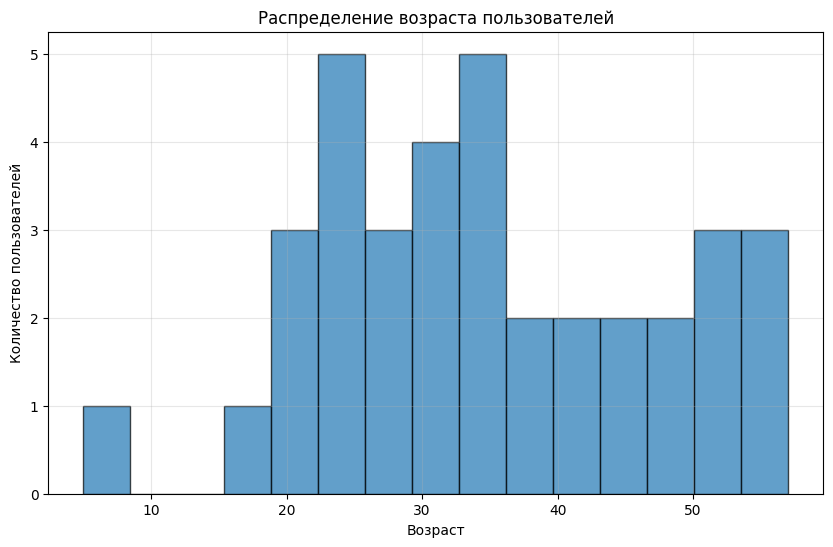

In [81]:
from matplotlib import figure
import os
#2.4
#Создадим дирректорию для сохранения графиков
os.makedirs('figures', exist_ok=True)
#Посмотрим на распределение пользователей по возрасту
plt.figure(figsize=(10, 6))
plt.hist(clean_data['age'], bins=15, alpha=0.7, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возраста пользователей')
plt.grid(True, alpha=0.3)
plt.savefig('figures/age_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x600 with 0 Axes>

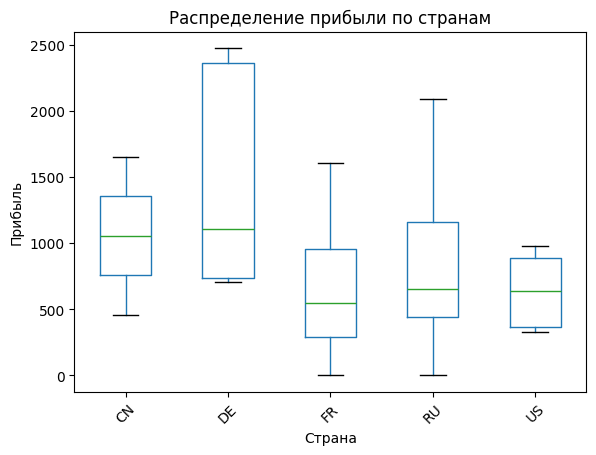

In [82]:
#боксплот для просмотра различия в распределении прибыли между странами
plt.figure(figsize=(12, 6))
clean_data.boxplot(column='revenue', by='country', grid=False)
plt.title('Распределение прибыли по странам')
plt.suptitle('')
plt.xlabel('Страна')
plt.ylabel('Прибыль')
plt.xticks(rotation=45)
plt.savefig('figures/revenue_by_country_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

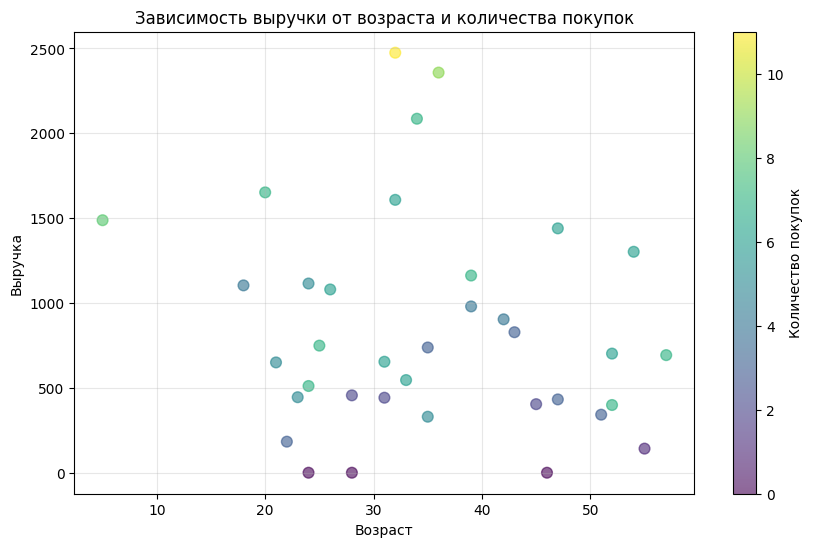

In [83]:
#диаграмма рассеяния? для просмотра связи между возрастом и выручкой
plt.figure(figsize=(10, 6))
scatter = plt.scatter(clean_data['age'], clean_data['revenue'], c=clean_data['purchases'],
                     cmap='viridis', alpha=0.6, s=60)
plt.colorbar(scatter, label='Количество покупок')
plt.xlabel('Возраст')
plt.ylabel('Выручка')
plt.title('Зависимость выручки от возраста и количества покупок')
plt.grid(True, alpha=0.3)
plt.savefig('figures/age_vs_revenue_scatter.png', dpi=300, bbox_inches='tight')
plt.show()